#Loading

##Pyprind

In [ ]:
!pip install scikit-learn==0.18.2
!pip install pyprind
!pip install scipy

  Using cached https://files.pythonhosted.org/packages/26/c2/21c612f3a1b1ba97b7b4bbd1fcdc59b475a09e25efad13fec4565ab9d563/scikit-learn-0.18.2.tar.gz
  ERROR: Failed building wheel for scikit-learn
  Running setup.py clean for scikit-learn
Failed to build scikit-learn
ERROR: yellowbrick 0.9.1 has requirement scikit-learn>=0.20, but you'll have scikit-learn 0.18.2 which is incompatible.
ERROR: imbalanced-learn 0.4.3 has requirement scikit-learn>=0.20, but you'll have scikit-learn 0.18.2 which is incompatible.
ERROR: fancyimpute 0.4.3 has requirement scikit-learn>=0.19.1, but you'll have scikit-learn 0.18.2 which is incompatible.
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1
    Running setup.py install for scikit-learn ... error
  Rolling back uninstall of scikit-learn
  Moving to /usr/local/lib/python3.7/dist-packages/scikit_learn-0.22.2.post1.dist-info/
   from /usr/local/lib

##Libraries

In [ ]:
from google.colab import drive
import os   
import sys        
import tarfile   
import time         
import re       
import pyprind
import numpy as np
import tweepy as tw
import pandas as pd
import pickle
import nltk
import csv
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer   
from sklearn.pipeline import Pipeline                
from sklearn.linear_model import LogisticRegression 
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV              
from sklearn.model_selection import train_test_split

from os import scandir

#from vectorizer import vect

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import xml.etree.ElementTree as etree
from lxml import etree
from xml.dom import minidom
from nltk import TweetTokenizer
from nltk.stem import SnowballStemmer 



In [ ]:
basepath = 'aclImdb'
source = 'http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz'
target = 'aclImdb_v1.tar.gz'

In [ ]:
#Do not use.
#drive.mount('/content/drive')

#Ready the twitter

In [ ]:
consumer_key = '7qEpJx4udZrB3cJFSmcoEuhZO'
consumer_secret = 'zVh9ftwfXUJfY4RmB1cCykzxsrhbEYeVzfBUxvDedpXQ8liWGL'
bearer = 'AAAAAAAAAAAAAAAAAAAAAEfrPAEAAAAAvwPVyFgNneWzv2BGQY0cKhAXVYw%3DNNcdt3sw6qZlVBXmur7qYMjU8M1ITCT6uGCdEqDzNtBpJUeJ9o'
access_token = '1387915262939303937-3xhcmOirF3pZgD61PvHZcgO0ny7SvD'
access_token_secret = 'nyssnnk4R03tKoLxHdMDW841o210G0hrRUTaH6UXlnHXQ'

In [ ]:
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

In [ ]:
api = tw.API(auth, wait_on_rate_limit=True)

#Get data from tweets

In [ ]:
search_words = "#CatShark"
data_since = "2021-05-05"

In [ ]:
#tweets = tw.Cursor(api.search, q= search_words, lang = "en", since = data_since).items(4000)
#tweets

In [ ]:
#data_frame = [[tweet.user.screen_name, tweet.user.location, tweet.text] for tweet in tweets]
#tw_df = pd.DataFrame(data = data_frame, columns= ["User", "Location", "Text"])

In [ ]:
#tw_df.head(10)

#Save the data in Drive

In [ ]:
#tw_df.to_csv("/content/drive/MyDrive/TweeterDataCSV/gura_unfiltered.csv", index= False, encoding="utf-8")

In [ ]:
vector= CountVectorizer(stop_words=None)

#Normalize functions

In [ ]:
def normalize_laughs(message):
  message = re.sub(r'\b(?=\w*[j])[aeiouj]{4,}\b', LAUGH, message, flags=re.IGNORECASE)
  message = re.sub(r'\b(?=\w*[k])[aeiouk]{4,}\b', LAUGH, message, flags=re.IGNORECASE)
  message = re.sub(r'\b(?=\w*[h])[aeiouk]{4,}\b', LAUGH, message, flags=re.IGNORECASE)
  message = re.sub(r'\b(juas+|lol)\b', LAUGH, message, flags=re.IGNORECASE)
  return message

In [ ]:
def process_twitter_features(message, twitter_features):

  message = re.sub(r'[\.\,]http','. http', message, flags=re.IGNORECASE)
  message = re.sub(r'[\.\,]#', '. #', message)
  message = re.sub(r'[\.\,]@', '. @', message)

  if twitter_features == REMOVE:
    # eliminar menciones, hashtags y URL
    message = re.sub(r'((?<=\s)|(?<=\A))(@|#)\S+', '', message)
    message = re.sub(r'\b(https?:\S+)\b', '', message, flags=re.IGNORECASE)
  elif twitter_features == NORMALIZE:
    # cuando sea necesario se normalizaran las menciones, hashtags y URL
    message = re.sub(r'((?<=\s)|(?<=\A))@\S+', MENTION, message)
    message = re.sub(r'((?<=\s)|(?<=\A))#\S+', HASHTAG, message)
    message = re.sub(r'\b(https?:\S+)\b', URL, message, flags=re.IGNORECASE)

  return message

In [ ]:
def preprocess(message):
  message = message.lower()
        
  message = re.sub(r'(\d+|\n|\brt\b)', '', message)
        
  for s,t in DIACRITICAL_VOWELS:
    message = re.sub(r'{0}'.format(s), t, message)
        
  message = re.sub(r'(.)\1{2,}', r'\1\1', message)
       
  message = normalize_laughs(message)
        
  for s,t in SLANG:
    message = re.sub(r'\b{0}\b'.format(s), t, message)

  message = process_twitter_features(message, _twitter_features)

  if _stemming:
    message = ' '.join(_stemmer.stem(w) for w in _tokenizer(message))

  return message

#Obtain corpus to train

##List files

In [ ]:
def files_of_path(path): 
    return [obj.name for obj in os.scandir(path) if obj.is_file()]
    
files= files_of_path("/content/drive/MyDrive/Tass_2017")
for file in files:
    print(file)

##File to CSV

In [ ]:
def list_to_csv(data, filename):
  with open(filename, 'w', encoding='utf-8') as csvfile:
    writer = csv.writer(csvfile, delimiter=',', lineterminator='\n', quoting=csv.QUOTE_NONNUMERIC)
    writer.writerows(data)

##CSV to list

In [ ]:
def csv_to_lists(filename):
  messages = []
  labels = []
  with open(filename, 'r', encoding='utf-8') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
      messages.append(row[1])
      labels.append(row[2])
  return messages, labels

#XML to df (General only)

In [ ]:
def general_tass_to_list(filename):
  tree = etree.parse(filename)
  root = tree.getroot()
  data = []

  for tweet in root:
    tweetId = tweet.find('tweetid').text
    content = tweet.find('content').text
    polarityValue = tweet.find('sentiments/polarity/value').text
    data.append([tweetId, content.replace('\n',' '), polarityValue])
  return data

In [ ]:
def general_tass_2017_to_list(filename,qrel=None):
  tree = etree.parse(filename)
  root = tree.getroot()
  data = []

  for tweet in root:
    tweetId = tweet.find('tweetid').text
    content = tweet.find('content').text
    polarityValue = qrel[tweetId]
    data.append([tweetId, content.replace('\n',' '), polarityValue])

  return data

#Fuse general with it's sentiment

In [ ]:
def gold_standard_to_dict(filename):
  with open(filename, 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter='\t')
    data = {rows[0]: rows[1] for rows in reader}

  return data

#Separate to train/test

In [ ]:
def generate_train_test_subsets(data, size):
  codes = [d[0] for d in data]
  labels = [d[2] for d in data]
  codes_train, codes_test, labels_train, labels_test = train_test_split(codes, labels, train_size=size)
  train_data = [d for d in data if d[0] in codes_train]
  test_data = [d for d in data if d[0] in codes_test]
  return train_data, test_data

#Execute

In [ ]:
!git clone 'https://github.com/luisFernandoCastellanosG/Machine_learning'

fatal: destination path 'Machine_learning' already exists and is not an empty directory.


In [ ]:
data = []
qrel = gold_standard_to_dict("/content/Machine_learning/Analisis_sentimientos_Twitter/espanish/datasets/Corpus/tass_2017/General Corpus of TASS/general-sentiment-3l.qrel")
data.extend(general_tass_2017_to_list("/content/Machine_learning/Analisis_sentimientos_Twitter/espanish/datasets/Corpus/tass_2017/General Corpus of TASS/general-tweets-test.xml", qrel))

#Define variables

In [ ]:
NORMALIZE = 'normalize'
REMOVE = 'remove'
MENTION = 'twmention'
HASHTAG = 'twhashtag'
URL = 'twurl'
LAUGH = 'twlaugh'
_stemmer = SnowballStemmer('spanish')
_tokenizer = TweetTokenizer().tokenize
_twitter_features="normalize"
_stemming=False
#Stuff to normalize
DIACRITICAL_VOWELS = [('á','a'), ('é','e'), ('í','i'), ('ó','o'), ('ú','u'), ('ü','u')]
SLANG = [('d','de'), ('[qk]','que'), ('xo','pero'), ('xa', 'para'), ('[xp]q','porque'),('es[qk]', 'es que'),
         ('fvr','favor'),('(xfa|xf|pf|plis|pls|porfa)', 'por favor'), ('dnd','donde'), ('tb', 'también'),
         ('(tq|tk)', 'te quiero'), ('(tqm|tkm)', 'te quiero mucho'), ('x','por'), ('\+','mas')]

#Functions to normalize

In [ ]:
def normalize_laughs(message):
  message = re.sub(r'\b(?=\w*[j])[aeiouj]{4,}\b', LAUGH, message, flags=re.IGNORECASE)
  message = re.sub(r'\b(?=\w*[k])[aeiouk]{4,}\b', LAUGH, message, flags=re.IGNORECASE)
  message = re.sub(r'\b(?=\w*[h])[aeiouk]{4,}\b', LAUGH, message, flags=re.IGNORECASE)
  message = re.sub(r'\b(juas+|lol)\b', LAUGH, message, flags=re.IGNORECASE)
  return message

In [ ]:
def process_twitter_features(message, twitter_features):
  message = re.sub(r'[\.\,]http','. http', message, flags=re.IGNORECASE)
  message = re.sub(r'[\.\,]#', '. #', message)
  message = re.sub(r'[\.\,]@', '. @', message)
  if twitter_features == REMOVE:
    message = re.sub(r'((?<=\s)|(?<=\A))(@|#)\S+', '', message)
    message = re.sub(r'\b(https?:\S+)\b', '', message, flags=re.IGNORECASE)
  elif twitter_features == NORMALIZE:
    message = re.sub(r'((?<=\s)|(?<=\A))@\S+', MENTION, message)
    message = re.sub(r'((?<=\s)|(?<=\A))#\S+', HASHTAG, message)
    message = re.sub(r'\b(https?:\S+)\b', URL, message, flags=re.IGNORECASE)
  return message

In [ ]:
def preprocess(message):
  message = message.lower()
  message = re.sub(r'(\d+|\n|\brt\b)', '', message)
  for s,t in DIACRITICAL_VOWELS:
    message = re.sub(r'{0}'.format(s), t, message)
  message = re.sub(r'(.)\1{2,}', r'\1\1', message)
  message = normalize_laughs(message)
  for s,t in SLANG:
    message = re.sub(r'\b{0}\b'.format(s), t, message)
  message = process_twitter_features(message, _twitter_features)
  if _stemming:
    message = ' '.join(_stemmer.stem(w) for w in _tokenizer(message))

  return message

#Download stopwords

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

#Read data and refine it

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/luisFernandoCastellanosG/Machine_learning/master/Analisis_sentimientos_Twitter/espanish/datasets/Corpus/dataset_2017_full.csv', encoding='utf-8')
#Index the data
df.columns = ['Tweetid', 'Tweet','Sentiment']
#Eliminate useless data
df = df.drop(columns="Tweetid")
#Normalize the data
df['Tweet'] = df['Tweet'].apply(preprocess)
df.loc[df['Sentiment'] == 'NONE', 'Sentiment'] = '-1'
df.loc[df['Sentiment'] == 'NEU', 'Sentiment'] = '0'
df.loc[df['Sentiment'] == 'P', 'Sentiment'] = '1'
df.loc[df['Sentiment'] == 'N', 'Sentiment'] = '2'
df["Sentiment"].unique()
#Save to Drive
df.to_csv('/content/drive/MyDrive/TweeterDataCSV/dataset_2017_refined.csv', index=False, encoding='utf-8')

#Tokenize/extract

In [ ]:
#Tokenize *and* clean
def tokenizer(text):
    text = re.sub('<[^>]*>', '', text)
    emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)', text.lower())
    text = re.sub('[\W]+', ' ', text.lower()) +' '.join(emoticons).replace('-', '')
    tokenized = [w for w in text.split() if w not in stop]
    return tokenized
#Extract a document
def stream_docs(path):
    with open(path, 'r', encoding='utf-8') as csv:
        next(csv)  # skip header
        for line in csv:
            text, label = line[:-3],  int(line[-2])
            yield text, label
#Return a number of documents
def get_minibatch(doc_stream, size):
    docs, y = [], []
    try:
        for _ in range(size):
            text, label = next(doc_stream)
            docs.append(text)
            y.append(label)
    except StopIteration:
        return None, None
    return docs, y

#Train

In [ ]:
path='/content/drive/MyDrive/TweeterDataCSV/dataset_2017_refined.csv'
vect = HashingVectorizer(decode_error='ignore', 
                         n_features=2**21,
                         preprocessor=None, 
                         tokenizer=tokenizer)
clf = SGDClassifier(loss='log', random_state=1, max_iter=1)
doc_stream = stream_docs(path)
stop = stopwords.words('spanish')
classes = np.array([-1,0, 1,2])
for _ in range(50):
    X_train, y_train = get_minibatch(doc_stream, size=1000)
    if not X_train:
        break
    X_train = vect.transform(X_train)
    clf.partial_fit(X_train, y_train, classes=classes)
X_test, y_test = get_minibatch(doc_stream, size=5000)
X_test = vect.transform(X_test)
print('Precision: %.3f' % clf.score(X_test, y_test))
clf = clf.partial_fit(X_test, y_test)

Precision: 0.806


#Save to Drive

In [ ]:
dest = os.path.join('/content/drive/MyDrive/TweeterDataCSV/Classifier', 'pkl_objects')
if not os.path.exists(dest):
    os.makedirs(dest)
pickle.dump(stop, open(os.path.join(dest, 'stopwords.pkl'), 'wb'), protocol=4)   
pickle.dump(clf, open(os.path.join(dest, 'classifier.pkl'), 'wb'), protocol=4)

Change the default file direction to Classifier (Why tho?)

In [ ]:
#Why
os.chdir('/content/drive/MyDrive/TweeterDataCSV/Classifier')
#How
#Much pain

Deserialize

In [ ]:
clf = pickle.load(open(os.path.join('/content/drive/MyDrive/TweeterDataCSV/Classifier/pkl_objects/', 'classifier.pkl'), 'rb'))

#Normalize/analyze the data

In [ ]:
pbar = pyprind.ProgBar(50000)
df = pd.read_csv('/content/drive/MyDrive/TweeterDataCSV/paro_nacional_raw_unfiltered.csv', encoding='utf-8')
#creamos una columna llamada Sentimient donde guardaremos la predicción
df['Sentiment'] =''
#creamos una columna llamada Probability donde guardaremos la acertabilidad que dio el clasificador
df['Probability']=0
#conversión de sentimientos (numeros a palabras)= NONE->-1 | NEU -> 0 | P->1 | N->2
label = {-1:'No feeling', 0:'Neutral', 1:'Positive',2: 'Negative'}
for rowid in range(len(df.index)):
  text=df['Text'][rowid]
  textConvert = vect.transform([text]) 
  df['Sentiment'][rowid]=label[clf.predict(textConvert)[0]]
  df['Probability'][rowid]=np.max(clf.predict_proba(textConvert))*100
  pbar.update()
df.head(20)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
0% [######                        ] 100% | ETA: 00:29:31

,User,Location,Text,Sentiment,Probability
0,lecheconarro,NaN,"RT @tinixarianator: ""LE DOY 200MIL AL QUE ME A...",Positive,76
1,_cringyj_,he/him,RT @Reytorre: Murillo llena por ambos carriles...,Positive,68
2,Burbuja86757842,NaN,RT @AlirioUribeMuoz: Muy preocupante que la @P...,Negative,49
3,Jasonripivi,NaN,RT @angelamrobledo: Si están probando censurar...,Negative,53
4,YUDAIvaAdebutar,in the mágic shop,RT @nacisingracia_: Una de las mejores frases ...,Positive,71
5,moonchil_lu,NaN,"RT @ivntepop: 🇨🇴Aquí vamos, RESISTENCIA COLOMB...",Positive,71
6,DuxDumb,He!they✪㋛︎⌫,RT @Lau96215173: @DalasReview @DalasReview esp...,Positive,63
7,FrankAC9,Colombia,RT @LVMMOT7: Londres en este momento✊🏽🇨🇴 https...,Positive,68
8,gabrielapovedaa,NaN,RT @Reytorre: Murillo llena por ambos carriles...,Positive,68
9,Yuriana09600948,NaN,"RT @Raspao__: SUCEDE EN BUGA, VALLE DEL CAUCA....",Positive,65


Save to Drive

In [ ]:
df.to_csv('/content/drive/MyDrive/TweeterDataCSV/paro_nacional_treated_filtered.csv', index=False, encoding='utf-8')

This also analyzes the data

In [ ]:
def f_prediction(row):
  text=row['Text']
  textConvert = vect.transform([text]) 
  return label[clf.predict(textConvert)[0]]

def f_probability(row):
  text=row['Text']
  textConvert = vect.transform([text]) 
  return np.max(clf.predict_proba(textConvert))*100

df["Sentiment"] = df.apply(f_prediction, axis=1)
df["Probability"] = df.apply(f_probability, axis=1)

Sentiment
Negative    1584
Positive    8416
dtype: int64


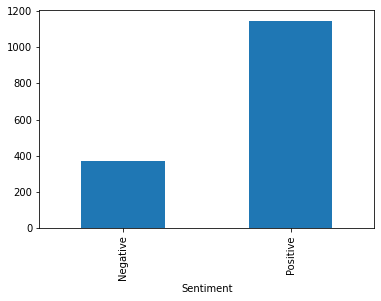

In [ ]:
df.groupby('Sentiment')['Location'].nunique().plot(kind='bar')
print(df.groupby(['Sentiment']).size())
plt.show()